# BOSTON DATASET ANÁLISIS

In [1]:
# Importando las librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Leyendo el csv
df = pd.read_csv("/content/CALIFORNIA_HOUSING.csv")

In [3]:
# Número de filas y número de columnas
print(f'{df.shape[0]} filas \n{df.shape[1]} columnas')

3000 filas 
9 columnas


In [4]:
# Primeros 5 registros
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [5]:
# Lista de variables involucradas, se observa que todas las varoables son de 
# de tipo flotante
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [6]:
# correlación de todas las variables
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925017,-0.064203,0.049865,0.070869,0.111572,0.051062,-0.018701,-0.050662
latitude,-0.925017,1.000000,-0.025143,-0.039632,-0.068245,-0.117318,-0.068296,-0.072363,-0.138428
housing_median_age,-0.064203,-0.025143,1.000000,-0.367850,-0.323154,-0.299888,-0.305171,-0.144315,0.091409
total_rooms,0.049865,-0.039632,-0.367850,1.000000,0.937749,0.838867,0.914116,0.221249,0.160427
total_bedrooms,0.070869,-0.068245,-0.323154,0.937749,1.000000,0.856387,0.970758,0.024025,0.082279
population,0.111572,-0.117318,-0.299888,0.838867,0.856387,1.000000,0.895530,0.032361,-0.001192
households,0.051062,-0.068296,-0.305171,0.914116,0.970758,0.895530,1.000000,0.048625,0.100176
median_income,-0.018701,-0.072363,-0.144315,0.221249,0.024025,0.032361,0.048625,1.000000,0.672695
median_house_value,-0.050662,-0.138428,0.091409,0.160427,0.082279,-0.001192,0.100176,0.672695,1.000000


In [7]:
# Librería para hacer análisis de correlación
# y evitar l a multicolinealidad
!pip install collinearity

In [8]:
# Para quitar multicolinealidad
from collinearity import SelectNonCollinear

In [9]:
# scoring de regresión
from sklearn.feature_selection import f_regression

In [10]:
# Umbral de 0.8 y clasificación
selector = SelectNonCollinear(correlation_threshold=0.8, scoring=f_regression)

In [11]:
selector.scoring_

<function sklearn.feature_selection._univariate_selection.f_regression>

In [12]:
# No consideramos las vvariables de latitud y longitud
feat = ['housing_median_age',
        'total_rooms',
        'total_bedrooms',
        'population',
        'households',
        'median_income']


X=df[feat].values
y=df['median_house_value'] # Variable objetivo

In [13]:
# Ajustando
selector.fit(X,y)
mask = selector.get_support()

In [14]:
# Variables no correlancionadas
no_col_df = pd.DataFrame(X[:,mask], columns = np.array(feat)[mask])
no_col_df.head()

,housing_median_age,total_rooms,median_income
0,27.0,3885.0,6.6085
1,43.0,1510.0,3.5990
2,27.0,3589.0,5.7934
3,28.0,67.0,6.1359
4,19.0,1241.0,2.9375


In [15]:
# Variables correlacionadas
col_df = pd.DataFrame(X[:,~np.array(mask)], columns = np.array(feat)[~np.array(mask)])
col_df.head()

,total_bedrooms,population,households
0,661.0,1537.0,606.0
1,310.0,809.0,277.0
2,507.0,1484.0,495.0
3,15.0,49.0,11.0
4,244.0,850.0,237.0


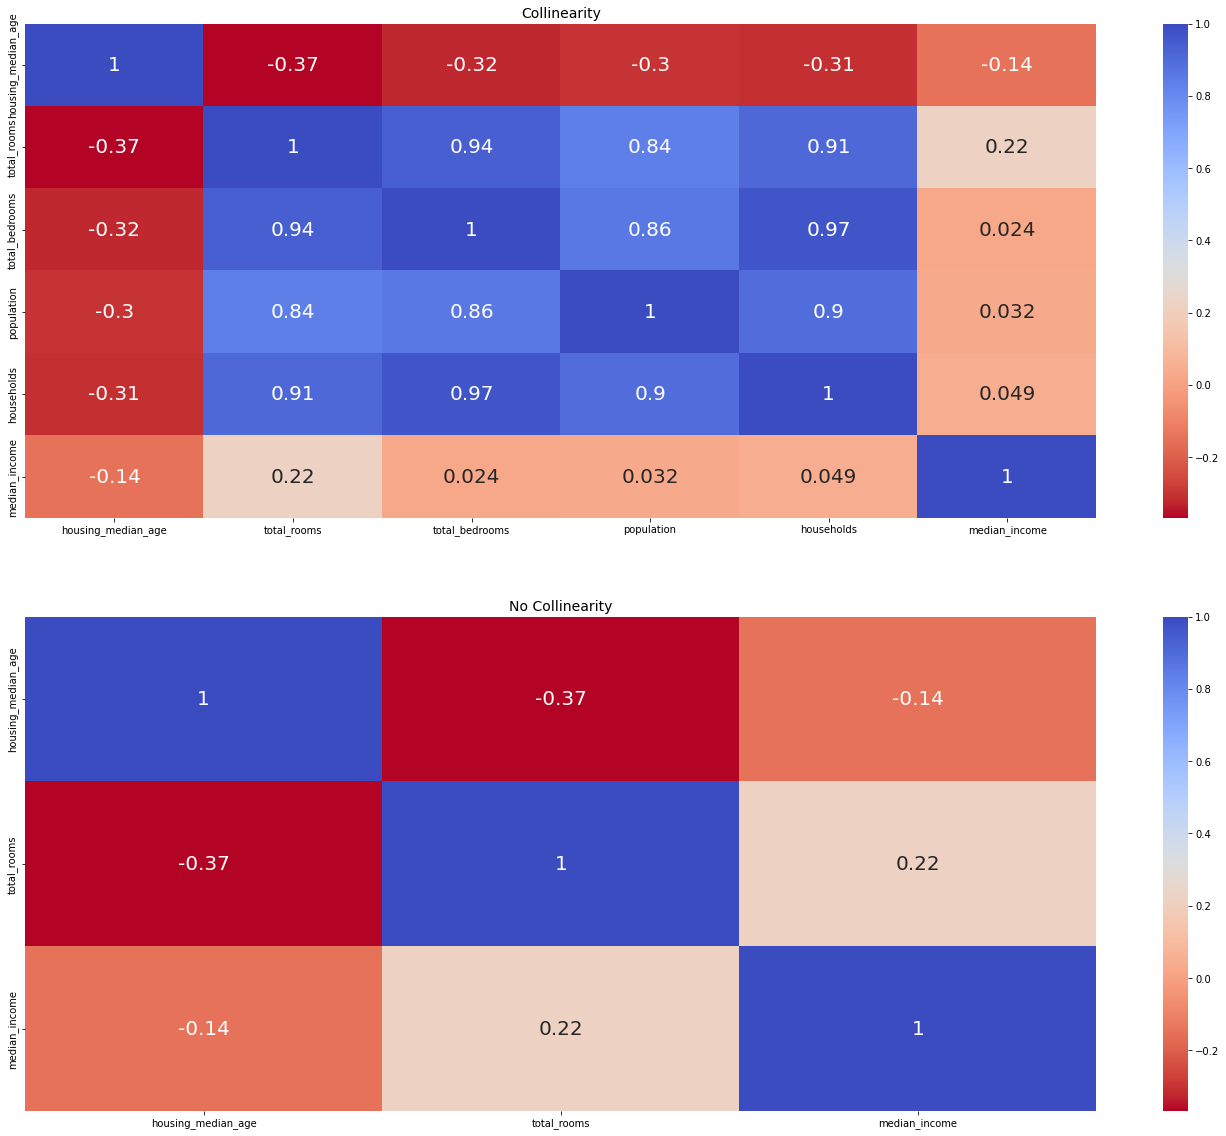

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Dataset clases balanceadas
sns.heatmap(df[feat].corr(), annot=True, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title('Collinearity', fontsize=14)


# Dataset clases balanceadas sin multicolinealidad
sns.heatmap(no_col_df.corr(), annot=True, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('No Collinearity', fontsize=14)
plt.show()

1. Describa de manera breve el fenomeno que relaciona, las variables involucradas y formule una pregunta problema.
Escasez de viviendas y costos de vivienda muy altos.
Valriables involucradas (parámetros de la base): Valor medio de la casa, ingreso medio

Preguntas posibles: ¿Qué factores influyen en el valor/precio promedio de una casa? 

Con el análisis previo se observa que **median_income** es la variable
que más influye en **median_house_value** 

2. Elija las variables mas relevantes a su criterio (explique el porque) y muestrelas en una grafica.
Valor medio de la casa, ingreso medio 

Vas a graficar tus datos experimentales, y vas a ajustar el modelo que mejor se ajuste a esos datos. Puedes usar el comando polyfit.
El modelo puede ser lineal, cuadrático u otro. Para saber cuál se ajusta mejor , debes calcular el RMS (root mean square) entre tus datos y la curva. Con la misma función polyfit puedes calcularlo (es un residuo). El que tenga menor residuo es el mejor ajuste.
Una vez que obtengas el modelo (por ejemplo 7x^2 - 3x +7=0) lo añades a tu gráfica con los datos.




Con el análisis de multicolinealidad que se hizo se observa que las variables que se deben considerar son:
	
*   housing_median_age
*   total_rooms
*   median_income   

por lo cual se utilizarán para ajustar el polinimio




In [17]:
no_col_df.columns.to_list()

['housing_median_age', 'total_rooms', 'median_income']

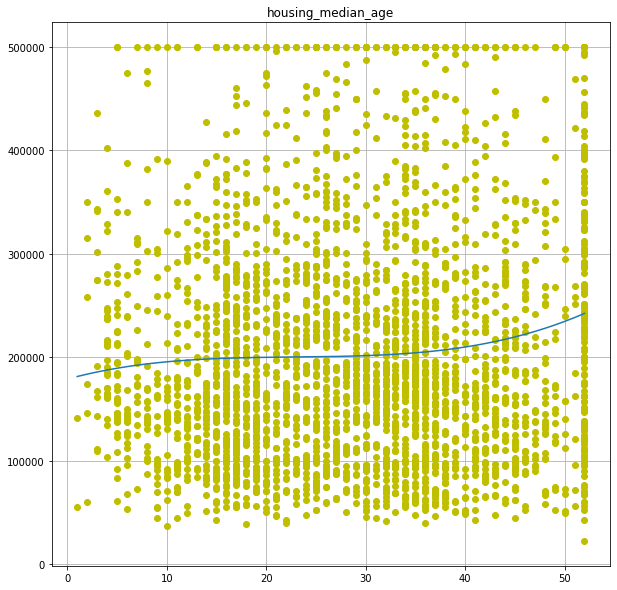

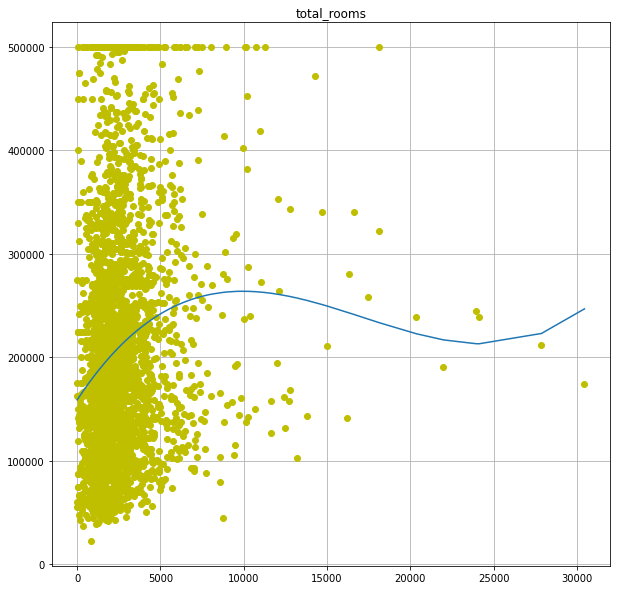

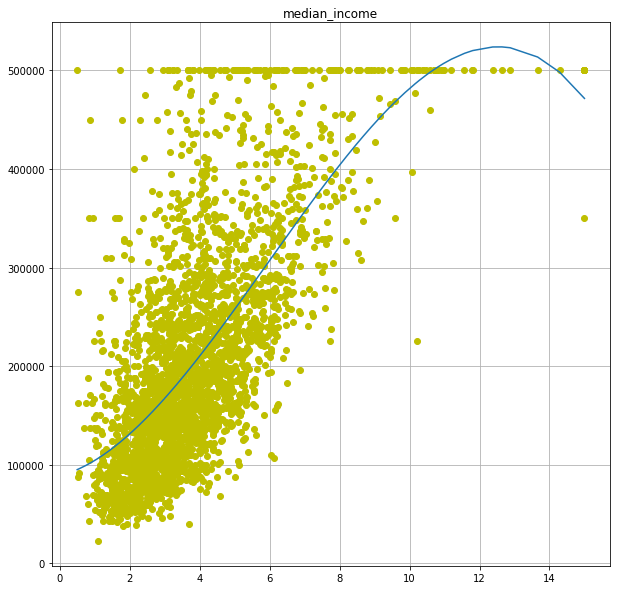

In [18]:
# SCATTER PLOT Y AJUSTANDO POLINOMIO DE GRADO 3
for i in no_col_df.columns.to_list():
  df2 = df[[i, 'median_house_value']].sort_values(i)
  x = df2[i].values
  y = df2['median_house_value'].values
  z = np.poly1d(np.polyfit(x, y, 3))
  plt.figure(figsize=(10,10))
  plt.title(i)
  plt.plot(x,y, 'yo', x, z(x), '-')
  #plt.xlim(0, 5)
  #plt.ylim(0, 20)
  plt.grid()
  plt.show()

Polinomio de grado  1
6.661338147750939e-13 

Polinomio de grado  2
6.661338147750939e-13 

Polinomio de grado  3
6.661338147750939e-13 

Polinomio de grado  4
6.661338147750939e-13 

Polinomio de grado  5
6.661338147750939e-13 

Polinomio de grado  6
6.661338147750939e-13 

Polinomio de grado  7
6.661338147750939e-13 

Polinomio de grado  8
6.661338147750939e-13 

Polinomio de grado  9
6.661338147750939e-13 

Polinomio de grado  10
6.661338147750939e-13 



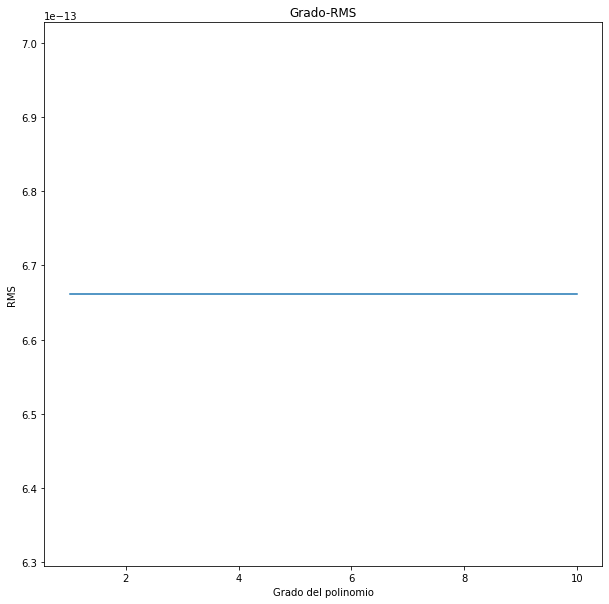

In [19]:
# Definitivamente la variale candidata es: 'median_income'
# por lo cual se buscará el grado del polinimio con menor RMS (root mean square)
RMS = []
g = np.arange(1,11)
for i in g:
  print("Polinomio de grado ",i)
  error = np.polyfit(x, y, i, full=True)[-1] # RESIDUOS
  print(error,"\n")
  RMS.append(error)

plt.figure(figsize=(10,10))
plt.title("Grado-RMS")
plt.plot(g,RMS,'-')
plt.xlabel("Grado del polinomio")
plt.ylabel("RMS")
#plt.xlim(0, 5)
#plt.ylim(0, 20)
plt.show()

In [20]:
# El RMS se mantiene estable para mayores grados

In [21]:
# Predicciones

In [22]:
datos_predecir = np.linspace(15,20,10)

In [23]:
z(datos_predecir)

array([471570.79400361, 443451.1210175 , 408475.16245635, 366246.16999652,
       316367.39531442, 258442.09008642, 192073.50598893, 116864.89469831,
        32419.50789097, -61659.40275672])

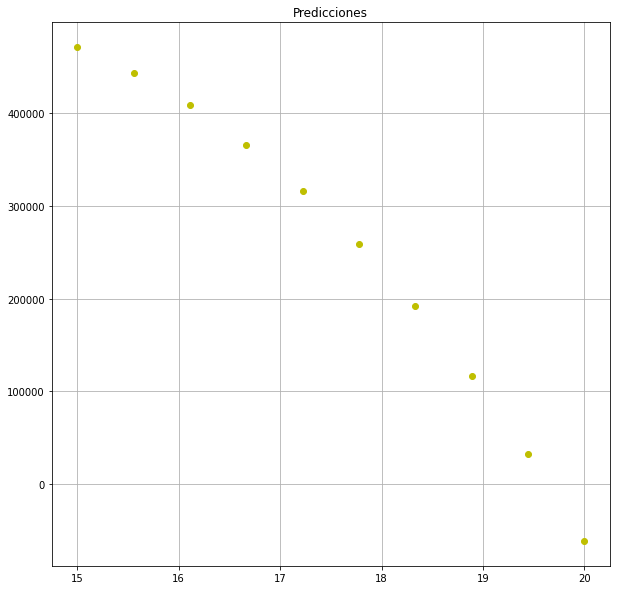

In [24]:
datos_predecir = np.linspace(15,20,10)

plt.figure(figsize=(10,10))
plt.title("Predicciones")
plt.plot(datos_predecir, z(datos_predecir), 'yo')
#plt.xlim(0, 5)
#plt.ylim(0, 20)
plt.grid()
plt.show()